In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Merging the tables

In [ ]:
all_data = pd.read_csv("data_files/all_data.csv")
win_data = pd.read_csv("data_files/win_data.csv")
coop_data = pd.read_csv("data_files/coop_data.csv")
pair_data = pd.read_csv("data_files/pair_data.csv")

In [3]:
df = (all_data
           .merge(coop_data,on=["Player1","Player2"], how="left")
           .merge(win_data, on=["Player1","Player2"], how="left")
           .merge(pair_data, on=["Player1","Player2"], how="left"))


In [4]:
df.head()

,Match,Player1,Player2,Score1,Score2,Actual_Rounds,Match_ID,A_Coop_Rate,B_Coop_Rate,Mutual_Coop_Rate,Mutual_Defect_Rate,First_Win,Second_Win,Draws,A_avg,B_avg,A_std,B_std
0,1,TitForTat,TitForTat,879,879,293,1,1.0,1.0,1.0,0.0,0,0,100,907.92,907.92,35.007622,35.007622
1,2,TitForTat,TitForTat,891,891,297,2,1.0,1.0,1.0,0.0,0,0,100,907.92,907.92,35.007622,35.007622
2,3,TitForTat,TitForTat,915,915,305,3,1.0,1.0,1.0,0.0,0,0,100,907.92,907.92,35.007622,35.007622
3,4,TitForTat,TitForTat,960,960,320,4,1.0,1.0,1.0,0.0,0,0,100,907.92,907.92,35.007622,35.007622
4,5,TitForTat,TitForTat,945,945,315,5,1.0,1.0,1.0,0.0,0,0,100,907.92,907.92,35.007622,35.007622


## Average Score of Each Strategies

C:\Users\Krishna\AppData\Local\Temp\ipykernel_22144\551488204.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(avg1,palette='muted',orient='h')


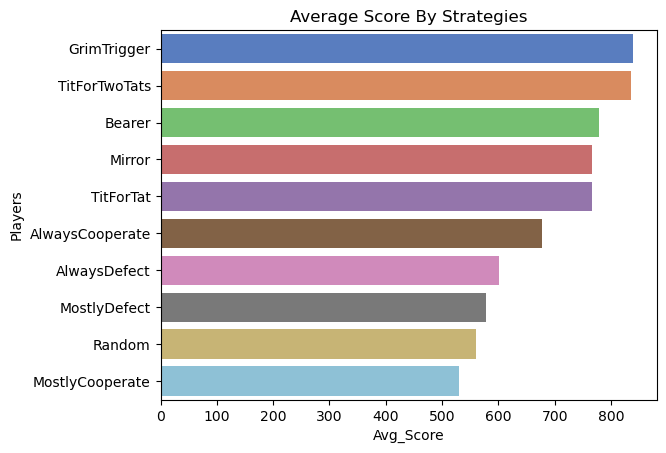

In [5]:
avg1=df.groupby('Player1')['Score1'].mean().sort_values(ascending=False)
sns.barplot(avg1,palette='muted',orient='h')
plt.title('Average Score By Strategies')
plt.ylabel('Players')
plt.xlabel('Avg_Score')
plt.show()

## Head to Head

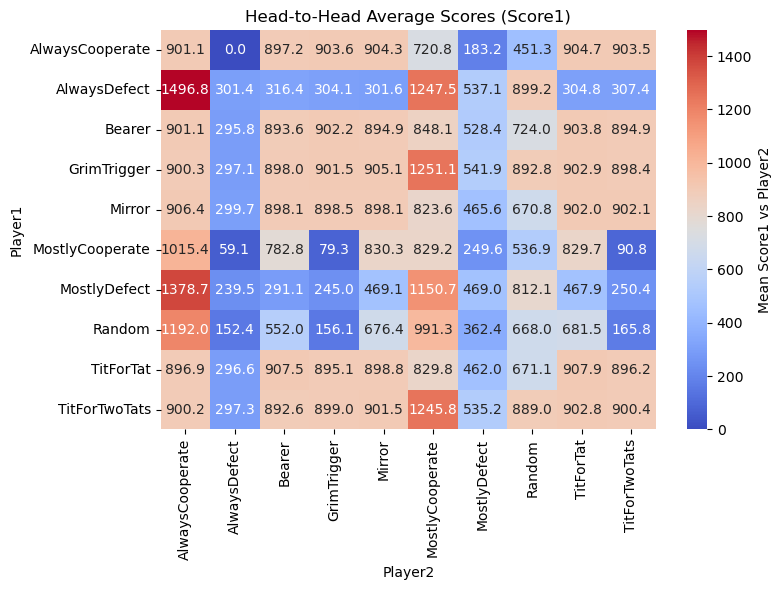

In [6]:
compare = df.pivot_table(
    index="Player1",
    columns="Player2",
    values="Score1",
    aggfunc="mean"
)

plt.figure(figsize=(8,6))
sns.heatmap(
    compare,
    annot=True,   
    fmt=".1f",        
    cmap="coolwarm",  
    cbar_kws={'label': 'Mean Score1 vs Player2'}
)
plt.title("Head-to-Head Average Scores (Score1)")
plt.ylabel("Player1")
plt.xlabel("Player2")
plt.tight_layout()
plt.show()


## Wins By Each Strategies

C:\Users\Krishna\AppData\Local\Temp\ipykernel_22144\1012939879.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=win_counts,x='Player1',y='Total_Wins',palette='coolwarm')


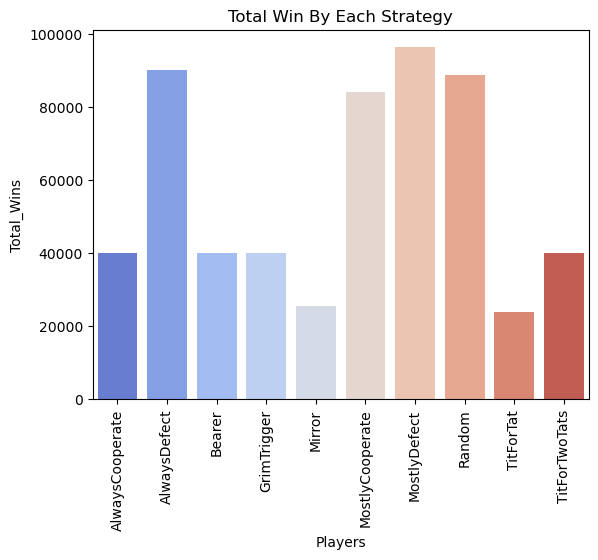

In [7]:
win_counts=df.groupby(['Player1'])[['First_Win','Second_Win','Draws']].sum().reset_index()
win_counts["Total_Wins"] = win_counts["First_Win"] + win_counts["Second_Win"]
sns.barplot(data=win_counts,x='Player1',y='Total_Wins',palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Total Win By Each Strategy')
plt.xlabel('Players')
plt.show()

<Axes: xlabel='Player1'>

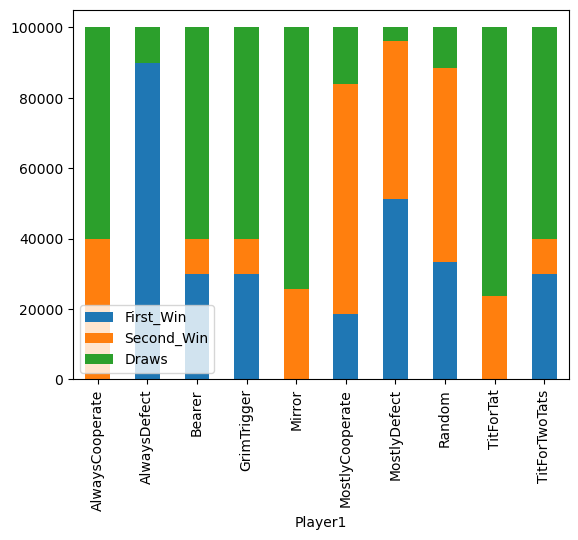

In [8]:
win_counts.plot(x='Player1',y=['First_Win','Second_Win','Draws'],kind='bar',stacked=True)

C:\Users\Krishna\AppData\Local\Temp\ipykernel_22144\2707347450.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=stable,x='Player1',y='std',palette='muted')


Text(0.5, 1.0, 'Stability')

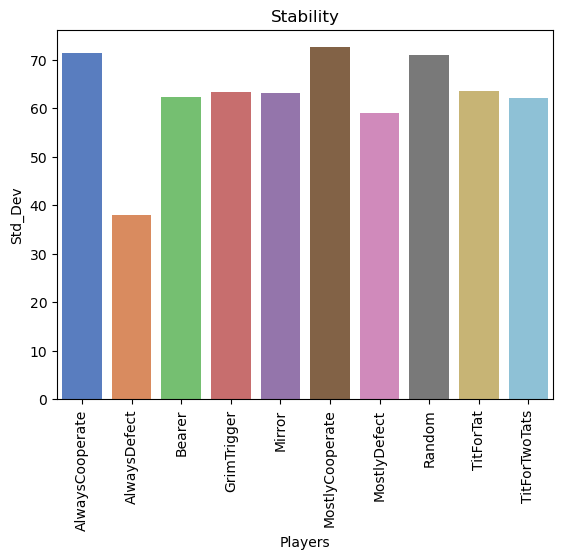

In [9]:
stable=df.groupby('Player1')[['A_std','B_std']].mean().reset_index()
stable['std']=stable['A_std']+stable['B_std']
sns.barplot(data=stable,x='Player1',y='std',palette='muted')
plt.xticks(rotation=90)
plt.xlabel('Players')
plt.ylabel('Std_Dev')
plt.title('Stability')

## Players Cooperation

C:\Users\Krishna\AppData\Local\Temp\ipykernel_22144\3402707397.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cooperation,x='Player1',y='Coop_Rate',palette='plasma')


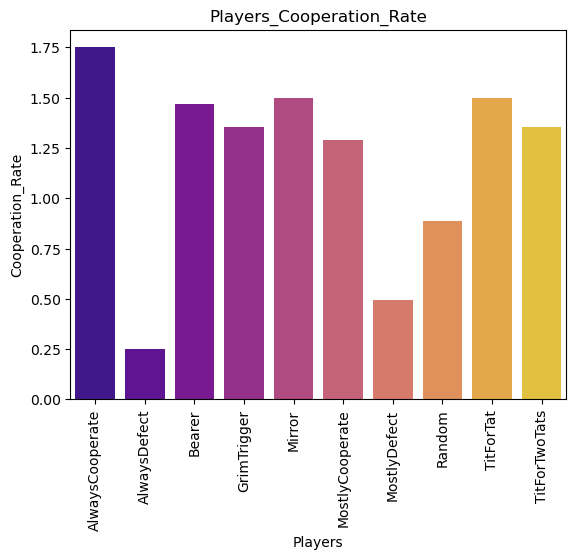

In [10]:
cooperation=df.groupby('Player1')[['A_Coop_Rate','B_Coop_Rate']].mean().reset_index()
cooperation['Coop_Rate']=cooperation['A_Coop_Rate']+cooperation['B_Coop_Rate']

sns.barplot(data=cooperation,x='Player1',y='Coop_Rate',palette='plasma')
plt.xlabel('Players')
plt.ylabel('Cooperation_Rate')
plt.title("Players_Cooperation_Rate")
plt.xticks(rotation=90)
plt.show()

## Mutual Cooperation

<Axes: xlabel='Player1', ylabel='Player2'>

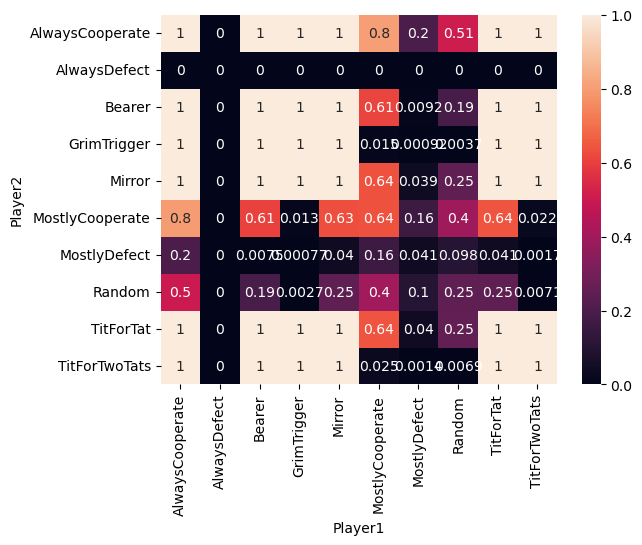

In [11]:
mutual_coop=df.pivot_table(columns='Player1',index='Player2',values='Mutual_Coop_Rate',aggfunc='mean')
sns.heatmap(mutual_coop,annot=True)

## Mutual Defect

<Axes: xlabel='Player1', ylabel='Player2'>

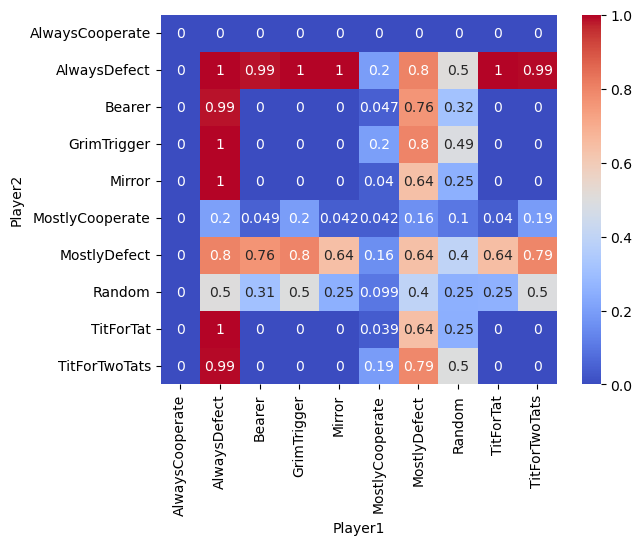

In [12]:
mutual_defect=df.pivot_table(columns='Player1',index='Player2',values='Mutual_Defect_Rate',aggfunc='mean')
sns.heatmap(mutual_defect,annot=True,cmap='coolwarm')

C:\Users\Krishna\AppData\Local\Temp\ipykernel_22144\1426775159.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_draw,x='Draws',y='Player1',orient='h',palette='plasma')


<Axes: xlabel='Draws', ylabel='Player1'>

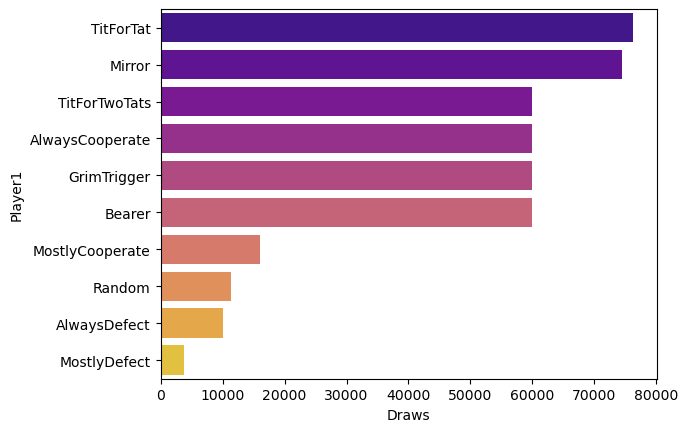

In [13]:
avg_draw=df.groupby('Player1')['Draws'].sum().sort_values(ascending=False).reset_index()
sns.barplot(data=avg_draw,x='Draws',y='Player1',orient='h',palette='plasma')

## Tradeoff Between Cooperation and Payoff

Text(0, 0.5, 'Cooperation Rate')

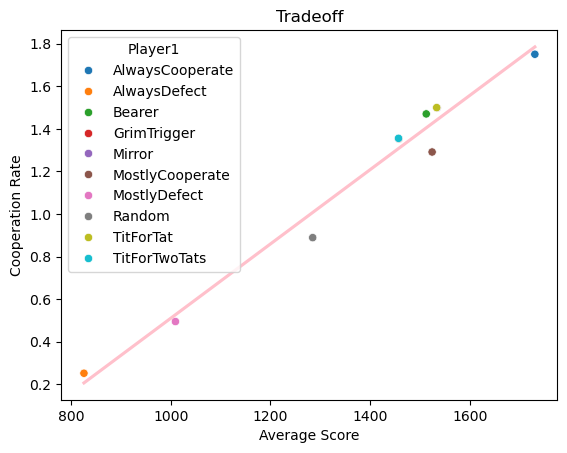

In [14]:
tradeoff=df.groupby('Player1')[['A_Coop_Rate','B_Coop_Rate','A_avg','B_avg']].mean().reset_index()
tradeoff['Coop_Rate']=tradeoff['A_Coop_Rate']+tradeoff['B_Coop_Rate']
tradeoff['Avg']=tradeoff['A_avg']+tradeoff['B_avg']
sns.scatterplot(data=tradeoff,x='Avg',y='Coop_Rate',hue='Player1')
sns.regplot(data=tradeoff, x="Avg", y="Coop_Rate", scatter=False, ci=None, color="pink")
plt.title('Tradeoff')
plt.xlabel('Average Score')
plt.ylabel('Cooperation Rate')


## Conclusion

1) Reciprocal strategies (TitForTat, TitForTwoTats, GrimTrigger) consistently deliver the best long-term outcomes.

2) Pure cooperation (AlwaysCooperate) is unstable and easily exploited.

3) Pure defection (AlwaysDefect) is consistent but not optimal overall.

4) Bearer holds a solid upper mid-tier — steady and cooperative, but not quite at the top.

5) Random and “Mostly” strategies underperform due to inconsistency.

6) Balanced reciprocity wins: reward cooperation, punish defection.